In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the dataset
df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
#dropping unnecessary columns
df.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df.shape

(24783, 2)

In [7]:
hate_tweets = df[df['class']==0]
offensive_tweets = df[df['class']==1]
neither = df[df['class']==2]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(1430, 2)
(19190, 2)
(19190, 2)
(4163, 2)


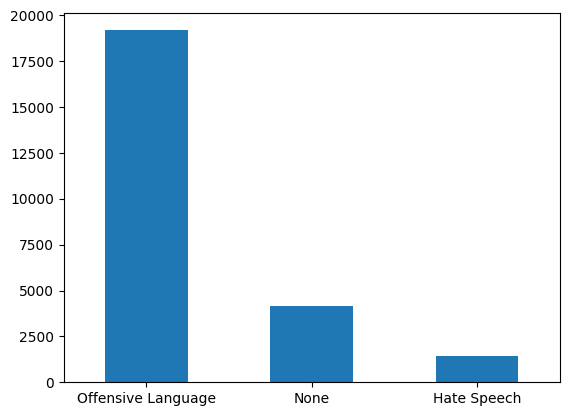

In [8]:
#visualizing the distribution of the classes  0 - hate speech 1 - offensive language 2 - neither
ax = df['class'].value_counts().plot(kind='bar')

ax.set_xticklabels(['Offensive Language', 'None', 'Hate Speech'], rotation=0)

plt.show()

In [9]:
#balancing the dataset

for i in range(3):
 hate_tweets = pd.concat([hate_tweets,hate_tweets],ignore_index = True)
neither = pd.concat([neither,neither,neither], ignore_index = True)
offensive_tweets = offensive_tweets.iloc[0:12000,:]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(11440, 2)
(12000, 2)
(12489, 2)


In [10]:
df = pd.concat([hate_tweets,offensive_tweets,neither], ignore_index = True)
print(df.shape)

(35929, 2)


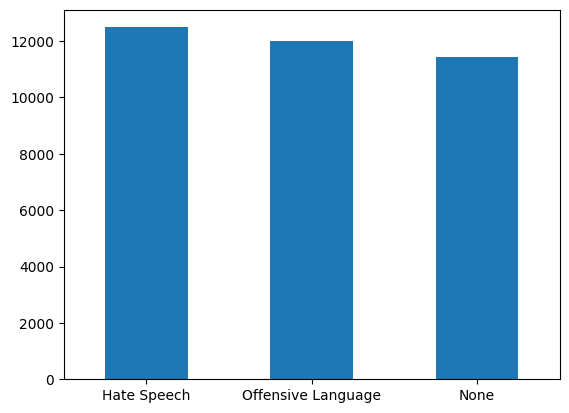

In [11]:
#visualizing the distribution of the classes after balancing the dataset
ax = df['class'].value_counts().plot(kind='bar')

ax.set_xticklabels(['Hate Speech', 'Offensive Language', 'None'], rotation=0)

plt.show()


In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Error loading wordnet: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>
[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>


False

In [14]:
d = {
    'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later','kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
    'cud':'could','fud':'food', 'u': 'you','ur':'your', 'bday' : 'birthday', 'bihday' : 'birthday'
}

In [15]:
#preprocessing the text

stop_words = set(stopwords.words("english"))
stop_words.add('rt')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9][a-zA-Z]))+')
mention_regex = '@[\w\-]+'

#cleaning the text
def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(mention_regex, ' ',text) #removing all user names
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("hm+", "", text) #removing variants of hmmm
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars lik
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [d[word] if word in d else word for word in text]  #replacing some sl
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

In [16]:
df['processed_tweets'] = df.tweet.apply(lambda x: clean_text(x))
df.head()

,class,tweet,processed_tweets
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",queer gaywad
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",alsarabsss he beaner smh tell he mexican
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",fuck gay blacklist hoe hold tehgodclan anyway
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",lmfaoooo hate black people black people nigger
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",least not nigger lmfao


In [17]:
x = df['processed_tweets']
y = df['class']

In [18]:
x.shape, y.shape

((35929,), (35929,))

In [19]:
#unique words
word_unique = []
for i in x:
    for j in i.split():
        word_unique.append(j)
unique, counts = np.unique(word_unique, return_counts=True)
print("The total words in the tweets are : ", len(word_unique))
print("The total UNIQUE words in the tweets are : ", len(unique))

The total words in the tweets are :  275540
The total UNIQUE words in the tweets are :  14146


In [20]:
tweets_length = []
for i in x:
    tweets_length.append(len(i.split()))
print("The Average Length tweets are : ",np.mean(tweets_length))
print("The max length of tweets is : ", np.max(tweets_length))
print("The min length of tweets is : ", np.min(tweets_length))

The Average Length tweets are :  7.669013888502324
The max length of tweets is :  28
The min length of tweets is :  0


In [21]:
tweets_length = pd.DataFrame(tweets_length)


In [22]:
#unique words sorted by frequency
unique_words = dict(zip(unique, counts))
unique_words = sorted(unique_words.items(), key=lambda x: x[1], reverse=True)
unique_words_freq = pd.DataFrame(unique_words, columns=['word', 'frequency'])
unique_words_freq.head()

,word,frequency
0,bitch,9066
1,like,3817
2,get,3636
3,hoe,3426
4,trash,3217


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=8000)
x_tfidf = tfidf.fit_transform(x).toarray()
x_tfidf.shape


(35929, 8000)

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=8000, oov_token='<oov>')
tokenizer.fit_on_texts(x)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x)

In [25]:
pad_length = 24
sequences = pad_sequences(sequences, maxlen = pad_length, truncating = 'pre', padding = 'pre')
sequences.shape

(35929, 24)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sequences, y, test_size=0.05, random_state=42)
print(x_train.shape, y_train.shape)

(34132, 24) (34132,)


In [27]:
from keras.layers import Embedding, SimpleRNN, GlobalMaxPool1D, Dense, Dropout
from keras.models import Sequential
import tensorflow as tf

pad_length = 24  # Sequence length
vocab_size = 8000  # Vocabulary size

recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=pad_length, input_shape=(pad_length,)),
    SimpleRNN(8, return_sequences=True),
    GlobalMaxPool1D(),
    Dense(20, activation='relu'),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])
model.summary()


c:\Users\diviit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\diviit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 24, 32)         │       256,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 24, 8)          │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 8)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,571 (1002.23 KB)

 Trainable params: 256,571 (1002.23 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.05)

Epoch 1/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6755 - loss: 0.7523 - sparse_categorical_crossentropy: 0.7523 - val_accuracy: 0.9291 - val_loss: 0.1997 - val_sparse_categorical_crossentropy: 0.1997
Epoch 2/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9386 - loss: 0.1994 - sparse_categorical_crossentropy: 0.1994 - val_accuracy: 0.9578 - val_loss: 0.1272 - val_sparse_categorical_crossentropy: 0.1272
Epoch 3/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9650 - loss: 0.1217 - sparse_categorical_crossentropy: 0.1217 - val_accuracy: 0.9666 - val_loss: 0.1198 - val_sparse_categorical_crossentropy: 0.1198
Epoch 4/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9785 - loss: 0.0804 - sparse_categorical_crossentropy: 0.0804 - val_accuracy: 0.9660 - val_loss: 0.1190 - val_sparse_categorical_crossentropy: 0.1190
Epoch 5/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9827 - loss: 0.0615 - sparse_categorical_crossentr

In [29]:
model.metrics_names

['loss', 'compile_metrics']

In [30]:
#test accuracy and loss
evaluate = model.evaluate(x_test, y_test)

print("Test Acuracy is : {:.2f} %".format(evaluate[1]*100))
print("Test Loss is : {:.4f}".format(evaluate[0]))



57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9653 - loss: 0.1584 - sparse_categorical_crossentropy: 0.1584
Test Acuracy is : 97.05 %
Test Loss is : 0.1255


In [31]:
predictions = model.predict(x_test)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [32]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))
    

In [33]:
from sklearn import metrics
cm = metrics.confusion_matrix(predict,y_test)
acc = metrics.accuracy_score(predict,y_test)

In [34]:
print("The Confusion matrix is: \n",cm)
print(acc*100)

The Confusion matrix is: 
 [[562  33   0]
 [  3 582   4]
 [  0  13 600]]
97.05063995548136


In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       565
           1       0.99      0.93      0.96       628
           2       0.98      0.99      0.99       604

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797



In [36]:
#sample prediction
pad_length = 24
sample = ["He is an idiot and a stupid fellow."]
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=pad_length, truncating='pre', padding='pre')
prediction = model.predict(sample)
print(prediction)
print(np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[2.4539318e-08 9.9943572e-01 5.6426501e-04]]
1
